<a href="https://colab.research.google.com/github/kasireddyasam/AI-course-/blob/main/FIFA23_Data_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('fifa23_cleaned_new.csv')
df.head()

,ID,Name,FullName,Age,Height,Weight,Overall,Potential,Growth,TotalStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,Lionel Messi,35,169,67,91,91,0,2190,...,75,96,20,35,24,6,11,15,14,8
1,165153,K. Benzema,Karim Benzema,34,185,81,91,91,0,2147,...,84,90,43,24,18,13,11,5,5,7
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,91,91,0,2205,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,91,91,0,2303,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,91,95,4,2177,...,80,88,26,34,32,13,5,7,11,6


In [41]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

In [42]:
data = data[needed_columns]
data.head()

,ID,Name,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,35,169,67,91,91,0,2190,452,...,75,96,20.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,165153,K. Benzema,34,185,81,91,91,0,2147,455,...,84,90,43.0,24.0,18.0,13.0,11.0,5.0,5.0,7.0
2,188545,R. Lewandowski,33,185,81,91,91,0,2205,458,...,90,88,35.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
3,192985,K. De Bruyne,31,181,70,91,91,0,2303,483,...,83,89,68.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0
4,231747,K. Mbappé,23,182,73,91,95,4,2177,470,...,80,88,26.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0


In [43]:
top = df.sort_values(by = 'Overall', ascending = False).head(20)

In [44]:
top.head()

,ID,Name,FullName,Age,Height,Weight,Overall,Potential,Growth,TotalStats,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,Lionel Messi,35,169,67,91,91,0,2190,...,75,96,20,35,24,6,11,15,14,8
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,91,91,0,2205,...,90,88,35,42,19,15,6,12,8,10
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,91,91,0,2303,...,83,89,68,65,53,15,13,5,10,13
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,91,95,4,2177,...,80,88,26,34,32,13,5,7,11,6
1,165153,K. Benzema,Karim Benzema,34,185,81,91,91,0,2147,...,84,90,43,24,18,13,11,5,5,7


In [45]:
top_pos = top['BestPosition']
top_names = top['Name']
top = top.drop(['Name','FullName', 'BestPosition', 'Nationality', 'ID'], axis = 1)


In [46]:

top.head()

,Age,Height,Weight,Overall,Potential,Growth,TotalStats,BaseStats,Club,ValueEUR,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,35,169,67,91,91,0,2190,452,453,54000000,...,75,96,20,35,24,6,11,15,14,8
2,33,185,81,91,91,0,2205,458,230,84000000,...,90,88,35,42,19,15,6,12,8,10
3,31,181,70,91,91,0,2303,483,399,107500000,...,83,89,68,65,53,15,13,5,10,13
4,23,182,73,91,95,4,2177,470,453,190500000,...,80,88,26,34,32,13,5,7,11,6
1,34,185,81,91,91,0,2147,455,494,64000000,...,84,90,43,24,18,13,11,5,5,7


# Split the Data into Two Parts

In [48]:
X=data.drop(['BestPosition','Nationality','ID'],axis=1).head(8514)
Y=pd.DataFrame(df['BestPosition']).head(8514)
print(X.shape,Y.shape)

(8514, 62) (8514, 1)


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)


<ipython-input-50-d8eb1e77b6e4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='BestPosition',data=Y_train,palette='hls')


<Axes: xlabel='BestPosition', ylabel='count'>

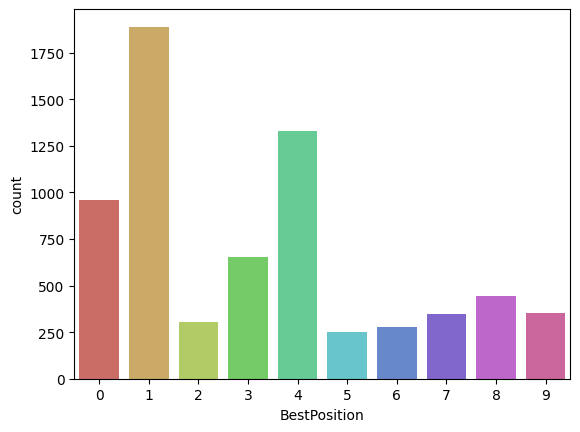

In [50]:
sns.countplot(x='BestPosition',data=Y_train,palette='hls')
